# Example 4

 $(n,k)$ Block Code

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand
from collections import Counter

# Generator matrix
* Eq. (7.2-8) 

$
G = \begin{bmatrix}
    1 & 0 & 0 & 0 & 1 & 0 & 1 \\
    0 & 1 & 0 & 0 & 1 & 1 & 1 \\
    0 & 0 & 1 & 0 & 1 & 1 & 0 \\
    0 & 0 & 0 & 1 & 0 & 1 & 1
\end{bmatrix}
$

Parity-check Matrix
* Example 7.2-1
* Eq. (7.3-3)


$
H = \begin{bmatrix}
1 & 1 & 1 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 & 1 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 & 1
\end{bmatrix}
$



In [98]:
# Generator matrix G
G = np.array([
    [1, 0, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1, 1]
])

# Compute the parity check matrix H
# Extract P from G (everything after the identity matrix)
P = G[:, 4:]

# H = [-P^T | I], but since in binary {-1 = 1}, 
# simply use P^T directly
k = G.shape[0]  # k: message length
n = G.shape[1]  # n: codeword length
n_minus_k = n - k  # n_minus_k: parity bits
I_n_k = np.identity(n_minus_k, dtype=int)
H = np.concatenate((P.T, I_n_k), axis=1)

print("Generator matrix G:")
print(G)
print("\nParity-check matrix H:")
print(H)


Generator matrix G:
[[1 0 0 0 1 0 1]
 [0 1 0 0 1 1 1]
 [0 0 1 0 1 1 0]
 [0 0 0 1 0 1 1]]

Parity-check matrix H:
[[1 1 1 0 1 0 0]
 [0 1 1 1 0 1 0]
 [1 1 0 1 0 0 1]]


# Message, Codeword, Weight

In [99]:
# Function to compute the weight of a codeword
def weight(codeword):
    return np.sum(codeword != 0)

# Generate all possible messages of length k
num_messages = 2**k
messages = np.array([[(i >> j) & 1 for j in range(k)][::-1] \
                     for i in range(num_messages)])

# Generate codewords and compute their weights
codewords = np.dot(messages, G) % 2
weights = np.array([weight(codeword) for codeword in codewords])

# Collecting messages, codewords, and their weights in a structured format
message_codeword_weight = [{"Message": m.tolist(), \
                            "Codeword": cw.tolist(), \
                            "Weight": w} for m, cw, w in \
                        zip(messages, codewords, weights)]

# Output the structured data
message_codeword_weight


[{'Message': [0, 0, 0, 0], 'Codeword': [0, 0, 0, 0, 0, 0, 0], 'Weight': 0},
 {'Message': [0, 0, 0, 1], 'Codeword': [0, 0, 0, 1, 0, 1, 1], 'Weight': 3},
 {'Message': [0, 0, 1, 0], 'Codeword': [0, 0, 1, 0, 1, 1, 0], 'Weight': 3},
 {'Message': [0, 0, 1, 1], 'Codeword': [0, 0, 1, 1, 1, 0, 1], 'Weight': 4},
 {'Message': [0, 1, 0, 0], 'Codeword': [0, 1, 0, 0, 1, 1, 1], 'Weight': 4},
 {'Message': [0, 1, 0, 1], 'Codeword': [0, 1, 0, 1, 1, 0, 0], 'Weight': 3},
 {'Message': [0, 1, 1, 0], 'Codeword': [0, 1, 1, 0, 0, 0, 1], 'Weight': 3},
 {'Message': [0, 1, 1, 1], 'Codeword': [0, 1, 1, 1, 0, 1, 0], 'Weight': 4},
 {'Message': [1, 0, 0, 0], 'Codeword': [1, 0, 0, 0, 1, 0, 1], 'Weight': 3},
 {'Message': [1, 0, 0, 1], 'Codeword': [1, 0, 0, 1, 1, 1, 0], 'Weight': 4},
 {'Message': [1, 0, 1, 0], 'Codeword': [1, 0, 1, 0, 0, 1, 1], 'Weight': 4},
 {'Message': [1, 0, 1, 1], 'Codeword': [1, 0, 1, 1, 0, 0, 0], 'Weight': 3},
 {'Message': [1, 1, 0, 0], 'Codeword': [1, 1, 0, 0, 0, 1, 0], 'Weight': 3},
 {'Message':

# Weight Distribution

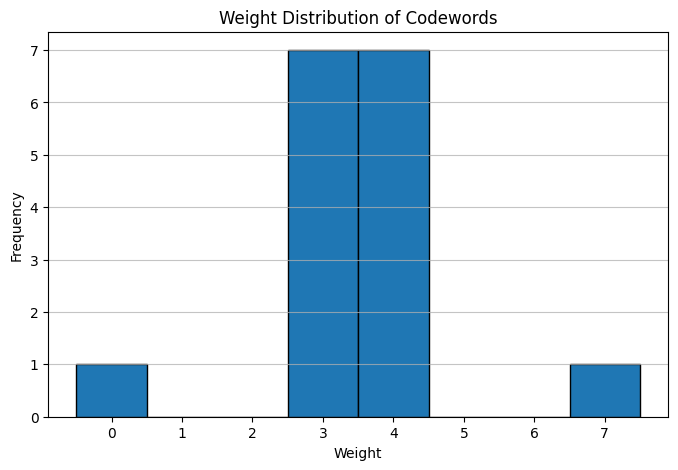

In [100]:
# Plot the weight distribution as a histogram
plt.figure(figsize=(8, 5))
plt.hist(weights, \
         bins=np.arange(weights.min(), weights.max() + 2) \
            - 0.5, ec='black')
plt.title('Weight Distribution of Codewords')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.xticks(range(min(weights), max(weights) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()


# Two conditions:
1. $\mathbf{c} \mathbf{H}^{\sf T} = 0$ for a valid codeword $c$, to ensure it meets the code's parity check.
2. $\mathbf{G} \mathbf{H}^{\sf T} = 0$, to verify the correctness of our generator and parity check matrices.

In [101]:
# Check condition cH^T = 0 for the example codeword
c_H_transpose = np.dot(codewords, H.T) % 2

# Check condition GH^T = 0
G_H_transpose = np.dot(G, H.T) % 2

(c_H_transpose, G_H_transpose)


(array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]),
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

# Hamming distance

In [102]:

# Initialize matrices to store the Hamming distances 
# and the weight of differences
hamming_distances = np.zeros((num_messages, num_messages), dtype=int)
weight_difference = np.zeros((num_messages, num_messages), dtype=int)

# Iterate through all pairs of codewords
for i in range(num_messages):
    for j in range(num_messages):
        # Compute the difference between codewords
        # this is also a codeword
        difference = codewords[i] - codewords[j] 
        # Compute the Hamming distance as the weight 
        # of the bitwise difference
        hamming_distance = np.sum(difference != 0)
        # Store the computed Hamming distance
        hamming_distances[i, j] = hamming_distance
        # Store the weight of the bitwise difference
        weight_difference[i, j] = weight(difference)

print("Hamming Distances:\n", hamming_distances)
print("Weight of Difference:\n", weight_difference)



Hamming Distances:
 [[0 3 3 4 4 3 3 4 3 4 4 3 3 4 4 7]
 [3 0 4 3 3 4 4 3 4 3 3 4 4 3 7 4]
 [3 4 0 3 3 4 4 3 4 3 3 4 4 7 3 4]
 [4 3 3 0 4 3 3 4 3 4 4 3 7 4 4 3]
 [4 3 3 4 0 3 3 4 3 4 4 7 3 4 4 3]
 [3 4 4 3 3 0 4 3 4 3 7 4 4 3 3 4]
 [3 4 4 3 3 4 0 3 4 7 3 4 4 3 3 4]
 [4 3 3 4 4 3 3 0 7 4 4 3 3 4 4 3]
 [3 4 4 3 3 4 4 7 0 3 3 4 4 3 3 4]
 [4 3 3 4 4 3 7 4 3 0 4 3 3 4 4 3]
 [4 3 3 4 4 7 3 4 3 4 0 3 3 4 4 3]
 [3 4 4 3 7 4 4 3 4 3 3 0 4 3 3 4]
 [3 4 4 7 3 4 4 3 4 3 3 4 0 3 3 4]
 [4 3 7 4 4 3 3 4 3 4 4 3 3 0 4 3]
 [4 7 3 4 4 3 3 4 3 4 4 3 3 4 0 3]
 [7 4 4 3 3 4 4 3 4 3 3 4 4 3 3 0]]
Weight of Difference:
 [[0 3 3 4 4 3 3 4 3 4 4 3 3 4 4 7]
 [3 0 4 3 3 4 4 3 4 3 3 4 4 3 7 4]
 [3 4 0 3 3 4 4 3 4 3 3 4 4 7 3 4]
 [4 3 3 0 4 3 3 4 3 4 4 3 7 4 4 3]
 [4 3 3 4 0 3 3 4 3 4 4 7 3 4 4 3]
 [3 4 4 3 3 0 4 3 4 3 7 4 4 3 3 4]
 [3 4 4 3 3 4 0 3 4 7 3 4 4 3 3 4]
 [4 3 3 4 4 3 3 0 7 4 4 3 3 4 4 3]
 [3 4 4 3 3 4 4 7 0 3 3 4 4 3 3 4]
 [4 3 3 4 4 3 7 4 3 0 4 3 3 4 4 3]
 [4 3 3 4 4 7 3 4 3 4 0 3 3 4 4 3]
 [3 4 4 3 7

In [103]:
hamming_distances - weight_difference

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Minimum Distance

In [104]:
num_messages = len(codewords)  # Number of codewords/messages

# Remove the diagonal elements for the search of 
# the minimum non-zero Hamming distance
np.fill_diagonal(hamming_distances, np.max(hamming_distances) + 1)

# Finding d_min from the adjusted Hamming distances
d_min = np.min(hamming_distances)

print("Minimum Hamming Distance (d_min):", d_min)


Minimum Hamming Distance (d_min): 3


# Minimum Weight

In [105]:
# Can use the above method for d_min or use the following:
# Finding the minimum weight using the codewords directly
# The minimum weight of a code is the minimum 
# of the weights of all nonzero codewords

# Initialize the minimum weight to a large value 
# before finding the actual minimum
min_weight_codewords = np.inf

# Iterate through all codewords to find the minimum non-zero weight
for codeword in codewords:
    cw_weight = weight(codeword)
    if 0 < cw_weight < min_weight_codewords:
        min_weight_codewords = cw_weight

min_weight_codewords
print("Minimum Weight (w_min):", min_weight_codewords)


Minimum Weight (w_min): 3


# WEP, Eq. 7.2-30

In [106]:

# Count the occurrence of each weight
weight_counts = Counter(weights)

# The maximum weight is the length of a codeword
max_weight = len(codewords[0])

# Initialize a list for coefficients with zeros
wep_coefficients = [0] * (max_weight + 1)

# Populate the coefficients based on weight counts
for weight, count in weight_counts.items():
    wep_coefficients[weight] = count

# Construct the WEP as a string for display
# Eq. 7.2-30
wep_str = " + ".join(f"{coef} Z^{i}" for i, coef \
                     in enumerate(wep_coefficients) if coef > 0)

wep_str


'1 Z^0 + 7 Z^3 + 7 Z^4 + 1 Z^7'

# IOWEF,  $B_{i,j}$



In [107]:
# Calculate the weight of each codeword
codeword_weights = np.sum(codewords, axis=1)

# Calculate the weight of each information sequence (message)
message_weights = np.sum(messages, axis=1)

# Function to count B_ij
def count_B_ij(codeword_weights, message_weights, i, j):
    return np.sum((codeword_weights == i) & (message_weights == j))

# Count B_31, B_42, B_74
B_31 = count_B_ij(codeword_weights, message_weights, 3, 1)
B_42 = count_B_ij(codeword_weights, message_weights, 4, 2)
B_74 = count_B_ij(codeword_weights, message_weights, 7, 4)

B_31, B_42, B_74


(3, 3, 1)

In [108]:
# Function to find information sequences and 
# corresponding codewords for given B_ij values
def find_sequences_codewords(codewords, messages, \
                             codeword_weights, message_weights, i, j):
    indices = np.where((codeword_weights == i) & (message_weights == j))[0]
    return [(messages[index], codewords[index]) for index in indices]

# Find sequences and codewords for B_31, B_42, B_74
sequences_codewords_B_31 = \
    find_sequences_codewords(codewords, messages, \
                             codeword_weights, message_weights, 3, 1)
sequences_codewords_B_42 = \
    find_sequences_codewords(codewords, messages, \
                             codeword_weights, message_weights, 4, 2)
sequences_codewords_B_74 = \
    find_sequences_codewords(codewords, messages, \
                             codeword_weights, message_weights, 7, 4)

sequences_codewords_B_31, sequences_codewords_B_42, \
    sequences_codewords_B_74


([(array([0, 0, 0, 1]), array([0, 0, 0, 1, 0, 1, 1])),
  (array([0, 0, 1, 0]), array([0, 0, 1, 0, 1, 1, 0])),
  (array([1, 0, 0, 0]), array([1, 0, 0, 0, 1, 0, 1]))],
 [(array([0, 0, 1, 1]), array([0, 0, 1, 1, 1, 0, 1])),
  (array([1, 0, 0, 1]), array([1, 0, 0, 1, 1, 1, 0])),
  (array([1, 0, 1, 0]), array([1, 0, 1, 0, 0, 1, 1]))],
 [(array([1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1]))])

(from Example 7.2-2)
### For $B_{31} = 3$
- Information Sequence: $[0, 0, 0, 1]$, Codeword: $[0, 0, 0, 1, 0, 1, 1]$
- Information Sequence: $[0, 0, 1, 0]$, Codeword: $[0, 0, 1, 0, 1, 1, 0]$
- Information Sequence: $[1, 0, 0, 0]$, Codeword: $[1, 0, 0, 0, 1, 0, 1]$

### For $B_{42} = 3$
- Information Sequence: $[0, 0, 1, 1]$, Codeword: $[0, 0, 1, 1, 1, 0, 1]$
- Information Sequence: $[1, 0, 0, 1]$, Codeword: $[1, 0, 0, 1, 1, 1, 0]$
- Information Sequence: $[1, 0, 1, 0]$, Codeword: $[1, 0, 1, 0, 0, 1, 1]$

### For $B_{74} = 1$
- Information Sequence: $[1, 1, 1, 1]$, Codeword: $[1, 1, 1, 1, 1, 1, 1]$


# Weight Distribution Polynomial, Eq. 7.3-2


$$ A(Z) = \frac{1}{n+1} \left[(1 + Z)^n + n(1 + Z)^{\frac{n-1}{2}}(1 - Z)^{\frac{n+1}{2}}\right] $$

$$ A(Z) = Z^7 + 7Z^4 + 7Z^3 + 1 $$


In [109]:
# Define the symbol Z
Z = symbols('Z')

# Calculate the weight distribution polynomial A(Z) 
# for (7,4) Hamming code
# Eq. 7.3-2
A_Z_eq_7_3_2 = (1 / (n + 1)) * ((1 + Z)**n \
                                + n*(1 + Z)**int((n - 1) / 2) \
                                * (1 - Z)**int((n + 1) / 2))

# Expand the polynomial for clarity
A_Z_expanded_final = expand(A_Z_eq_7_3_2)
A_Z_expanded_final # same result as Eq. 7.2-30


1.0*Z**7 + 7.0*Z**4 + 7.0*Z**3 + 1.0

# Error vector/pattern $\mathbf{e}$

In [110]:
# n is defined previously as the length of the codewords
# To generate all possible 2^n error patterns including 
# the zero vector for an (n, k) code
error_patterns = [np.array(list(np.binary_repr(i, width=n)), dtype=int) \
                  for i in range(2**n)]

print("Error patterns:")
error_patterns


Error patterns:


[array([0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 1, 1, 1]),
 array([0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 1]),
 array([0, 0, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 1, 0, 1, 1]),
 array([0, 0, 0, 1, 1, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 1]),
 array([0, 0, 0, 1, 1, 1, 0]),
 array([0, 0, 0, 1, 1, 1, 1]),
 array([0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 1]),
 array([0, 0, 1, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 0, 1, 1]),
 array([0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 1, 0, 1]),
 array([0, 0, 1, 0, 1, 1, 0]),
 array([0, 0, 1, 0, 1, 1, 1]),
 array([0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 1, 1, 0, 0, 1]),
 array([0, 0, 1, 1, 0, 1, 0]),
 array([0, 0, 1, 1, 0, 1, 1]),
 array([0, 0, 1, 1, 1, 0, 0]),
 array([0, 0, 1, 1, 1, 0, 1]),
 array([0, 0, 1, 1, 1, 1, 0]),
 array([0, 0, 1, 1, 1, 1, 1]),
 array([

# Syndrome

In [111]:

# Calculate the syndrome for each error pattern
syndromes = np.dot(error_patterns, H.T) % 2

# Present all unique syndromes
unique_syndromes = np.unique(syndromes, axis=0)

# Output
syndromes, unique_syndromes


(array([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1],
        [0, 1, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 0],
        [1, 0, 1],
        [1, 0, 0],
        [1, 1, 0],
        [1, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [0, 0, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 0, 0],
        [1, 1, 1],
        [1, 1, 0],
        [0, 0, 1],
        [0, 0, 0],
        [0, 1, 1],
        [0, 1, 0],
        [1, 1, 1],
        [1, 1, 0],
        [1, 0, 1],
        [1, 0, 0],
        [0, 1, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 0],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [0, 0, 1],
        [0, 0, 0],
        [0, 1, 1],
        [0, 1, 0],
        [1, 

In [112]:
# Count how many syndromes are there
total_syndromes = syndromes.shape[0]

# Count how many unique syndromes are there
total_unique_syndromes = unique_syndromes.shape[0]

total_syndromes, total_unique_syndromes

(128, 8)